<a href="https://colab.research.google.com/github/MoudiAlhazzaa/Machine_learning_Project/blob/main/T5_Project_Module_4_Machine_Learning_Nawaf_Moudi_Zahrah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparative Analysis of Machine Learning Models on the Iris Dataset Analysis**
### BY: Nawaf Aljalaud / ... / ...
#### "SDAIA Bootcamp T5": Project-Module 4 Machine Learning


##Tasks and Mark Distribution:

##1. Data Preprocessing


 * Load the Iris dataset.



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, names=columns)

* Perform data exploration and visualization.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration
print(iris.head())
print(iris.tail())
print(iris.sample(5))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica
     sepal_length  sepal_width  petal_length  petal_width          species
36            5.5          3.5           1.3          0.2      Iris

In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
num_rows, num_cols = iris.shape # num of cols and rows
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 150
Number of columns: 5


In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

* visualization using Swarmplots to show the distribution of measurements by species.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


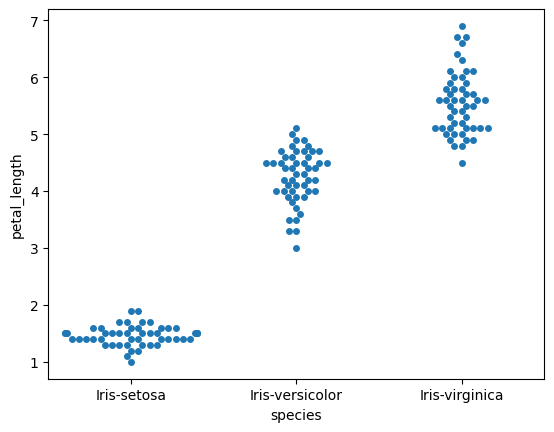

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


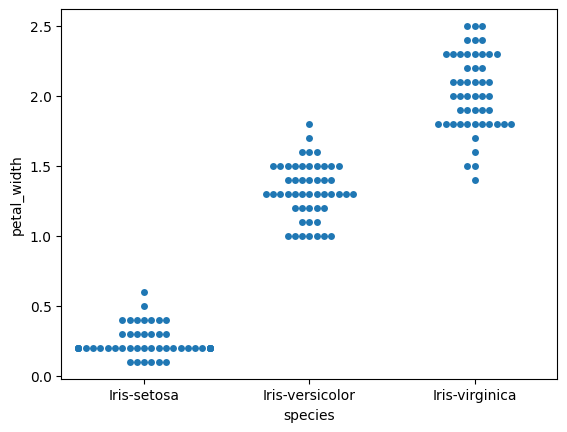

In [4]:
#species vs petal_length
sns.swarmplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

#species vs petal_width
sns.swarmplot(x = 'species', y = 'petal_width', data = iris)
plt.show()

* Check for missing values and handle them if any.

In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
dup_rows = iris.duplicated() # check for duplicate each row
dup_rows

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
iris.describe(include='object')

,species
count,150
unique,3
top,Iris-setosa
freq,50


* Split the dataset into features and the target variable

In [ ]:
X = iris.drop('species', axis=1)
y = iris['species']

##2. Unsupervised Learning: Clustering and Outlier Detection


* Apply K-means clustering algorithm to cluster the data.
* Visualize the clusters.





---------------------------------------------------

Import the important libries

In [47]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score


By selecting specific columns from the dataset, creating a new dataset X that includes only the features related to the sepal length and sepal width.

In [9]:
X = iris[['sepal_length', 'sepal_width']]

A Scatter plot to visualize the relationship between the sepal length and sepal width.
 The x-axis represents the sepal length, the y-axis represents the sepal width, and each data point is plotted as a marker on the graph.

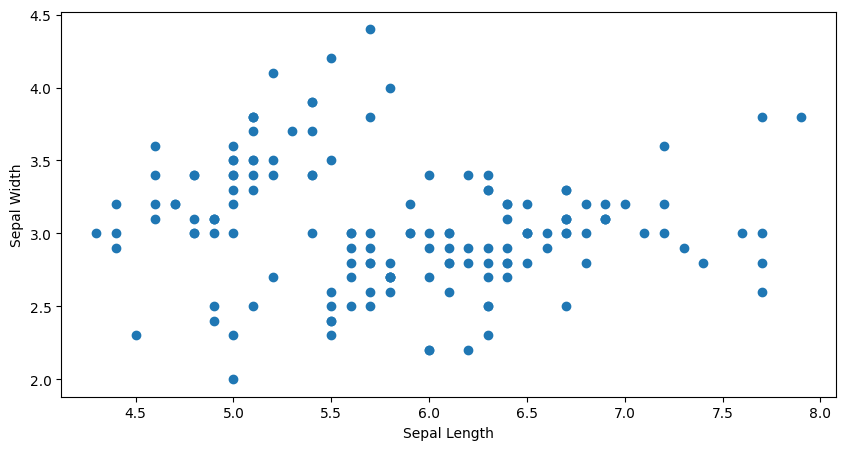

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(x= X['sepal_length'], y=X['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');

Performing the K-means clustering algorithm on the X dataset, aim to partition the data into 3 clusters based on the values of the features 'sepal_length' and 'sepal_width'.

In [12]:
kmeans = KMeans(n_clusters = 3, random_state =42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

A scatter plot to visualize the relationship between the sepal length and sepal width. This plot can help visualize how well the K-means algorithm grouped the data points into clusters based on their features.

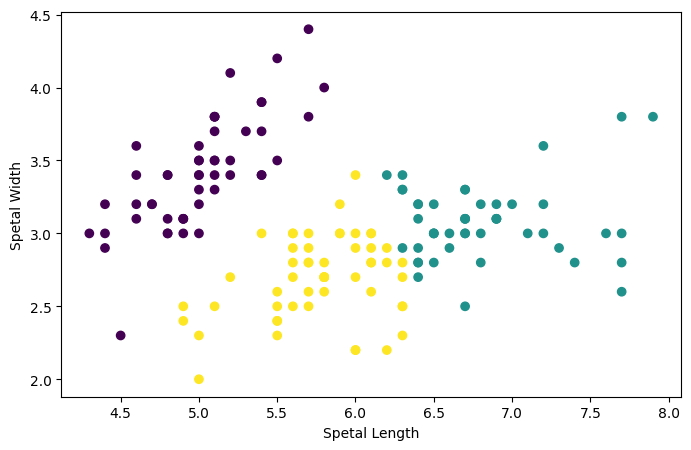

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= kmeans.labels_)
plt.xlabel('Spetal Length')
plt.ylabel('Spetal Width');

To retrieve the cluster labels of each data point

In [53]:
kmeans.labels_

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

 Detect outliers using appropriate technique DBSCAN.

------------------------------------------------

 * The eps specifies the max distance between two data points for them to be considered as neighbors.
 * The min_samples parameter indicates the mini number of data points.
  Aim to identify clusters and outliers based eps and min_sample).

In [44]:
model = DBSCAN(eps=0.3, min_samples=8) # parameters are epsilon and mini num of points
model = model.fit(X)

Print the cluster labels. The cluster labels can be pos integers representing different clusters or zero representing noise points.

In [45]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [32]:
model.core_sample_indices_

array([  0,   1,   7,   9,  17,  26,  30,  34,  35,  37,  39,  40,  43,
        55,  58,  63,  64,  65,  67,  71,  73,  74,  75,  77,  78,  79,
        82,  86,  91,  92,  96,  97,  99, 101, 103, 112, 114, 126, 127,
       128, 132, 133, 140, 142, 143, 145])

Print the set of unique cluster labels.

In [33]:
set(model.labels_)

{-1, 0, 1, 2}

Obtain information about the clusters.

In [46]:
n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_noise_ = list(model.labels_).count(-1)

print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)

Number of clusters: 2
Number of noise points: 25


 Evaluate the clustering results.

-----------------------------------

Silhouette score is 0.702, it indicates that the clusters identified by the K-means algorithm in the given dataset have a relatively good separation and cohesion.

In [48]:
X, y = make_blobs(random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
silhouette_score(X, kmeans.fit_predict(X))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7020937832636733

## 3. Supervised Learning: Baseline Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
